#### Testing our implemented algorithms for real 2D dataset

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
import struct
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

This below dataset, we found it on the Kaggle website: https://www.kaggle.com/datasets/nunofachada/elongated-clustering/data (original dataset: s1.csv)


In [47]:
df = pd.read_csv('2D_dataset.csv')
df.head()

,x,y,group
0,18.209,18.096,1
1,17.303,15.959,1
2,19.783,21.903,1
3,18.908,16.932,1
4,19.894,18.854,1


In [48]:
df

,x,y,group
0,18.2090,18.096,1
1,17.3030,15.959,1
2,19.7830,21.903,1
3,18.9080,16.932,1
4,19.8940,18.854,1
...,...,...,...
496,8.3271,-28.583,10
497,9.4920,-26.647,10
498,12.0880,-19.010,10
499,10.3530,-26.484,10


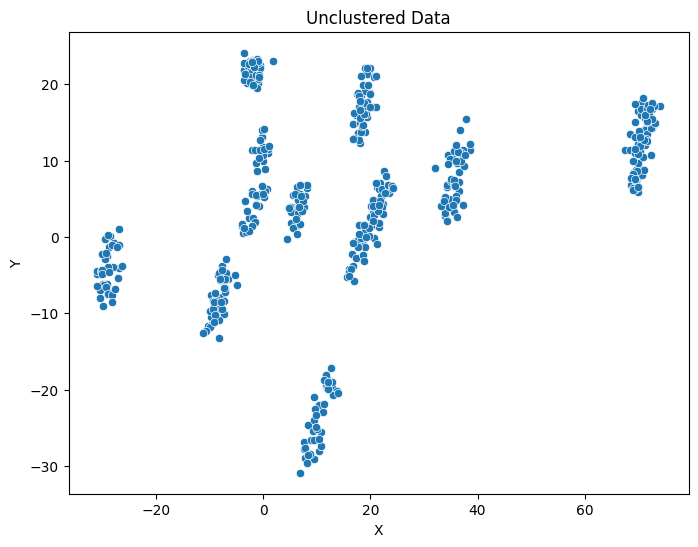

In [49]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'x', y = 'y', data = df)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unclustered Data')
plt.show()

In [50]:
data = df[['x', 'y']].values  

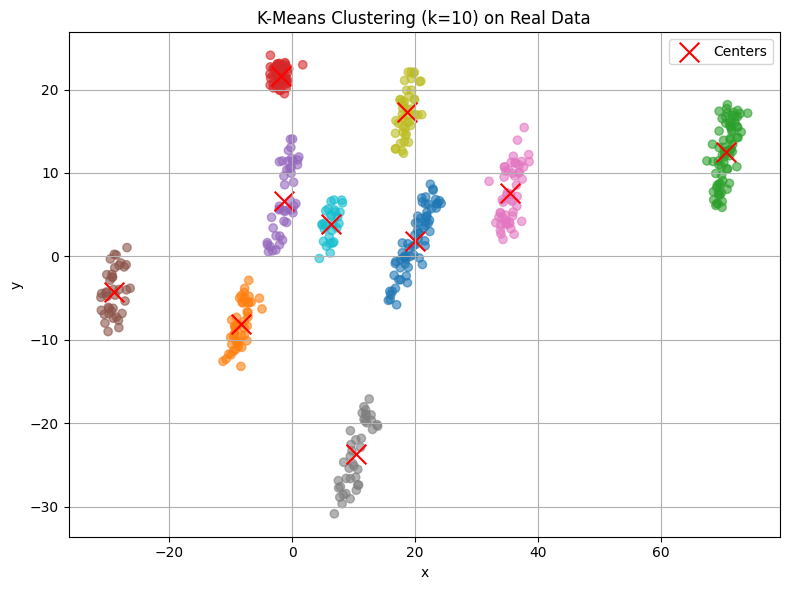

Centres détectés : [[ 20.04962687   1.8895903 ]
 [ -8.38403542  -8.15085833]
 [ 70.62982192  12.49253836]
 [ -1.88375534  21.57033846]
 [ -1.25454771   6.6813131 ]
 [-29.02433333  -4.24340769]
 [ 35.54890385   7.54838269]
 [ 10.40073171 -23.73117073]
 [ 18.68244444  17.28337778]
 [  6.33213448   3.84467172]]
Inertie : 5997.4474
Score de silhouette : 0.7416


In [51]:
def cluster_real_data_with_kmeans(data, n_clusters):
    if data.size == 0:
        print("Aucune donnée fournie.")
        return

    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_

    # Plot like your synthetic function
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')
    plt.legend()
    plt.title(f"K-Means Clustering (k={n_clusters}) on Real Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("Centres détectés :", centers)
    print(f"Inertie : {kmeans.inertia_:.4f}")
    if n_clusters > 1:
        silhouette = silhouette_score(data, labels)
        print(f"Score de silhouette : {silhouette:.4f}")

# --- Call the function like your generate_gaussian_clusters() ---
n_clusters = 10  # Or use best_k from silhouette analysis
cluster_real_data_with_kmeans(data, n_clusters)

## Applying K-mean on Data


Centres trouvés par K-Means :
[[ 20.04962687   1.8895903 ]
 [ -8.38403542  -8.15085833]
 [ 70.62982192  12.49253836]
 [ -1.88375534  21.57033846]
 [ -1.25454771   6.6813131 ]
 [-29.02433333  -4.24340769]
 [ 35.54890385   7.54838269]
 [ 10.40073171 -23.73117073]
 [ 18.68244444  17.28337778]
 [  6.33213448   3.84467172]]

Inertie (somme des distances intra-cluster) : 5997.4474
Score de silhouette : 0.7416

Temps d'exécution de K-Means : 0.0917 secondes


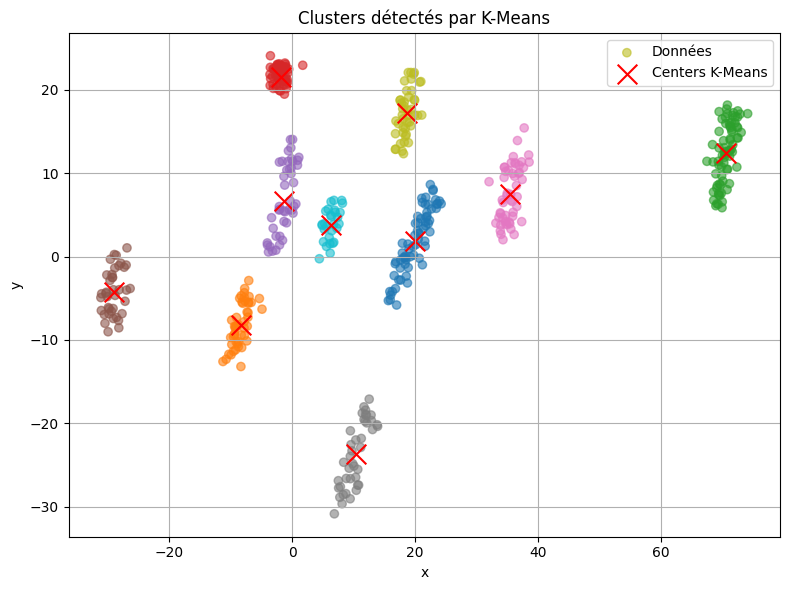

In [52]:
# Check if data is not empty 
if data.size > 0:
    # Measure execution time
    start_time = time.time()

    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels_pred = kmeans.fit_predict(data)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # --- Output cluster centers ---
    print("\nCentres trouvés par K-Means :")
    print(kmeans.cluster_centers_)

    # --- Evaluate clustering ---
    inertia = kmeans.inertia_
    print(f"\nInertie (somme des distances intra-cluster) : {inertia:.4f}")

    if n_clusters > 1:
        silhouette = silhouette_score(data, labels_pred)
        print(f"Score de silhouette : {silhouette:.4f}")

    print(f"\nTemps d'exécution de K-Means : {elapsed_time:.4f} secondes")

    # --- Plot results ---
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels_pred, cmap='tab10', alpha=0.6, label='Données')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='x', s=200, label='Centers K-Means')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Clusters détectés par K-Means")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Aucune donnée trouvée ou chargée.")

In [53]:
def find_optimal_clusters(data, max_clusters=15):
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))
        
    return inertias, silhouette_scores


In [54]:
def plot_metrics(inertias, silhouette_scores):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot inertia
    ax1.plot(range(2, len(inertias) + 2), inertias, 'bo-')
    ax1.set_xlabel('Nombre de clusters')
    ax1.set_ylabel('Inertie')
    ax1.set_title('Méthode du coude')
    
    # Plot silhouette scores
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, 'ro-')
    ax2.set_xlabel('Nombre de clusters')
    ax2.set_ylabel('Score de silhouette')
    ax2.set_title('Scores de silhouette')
    
    plt.tight_layout()
    plt.show()
    

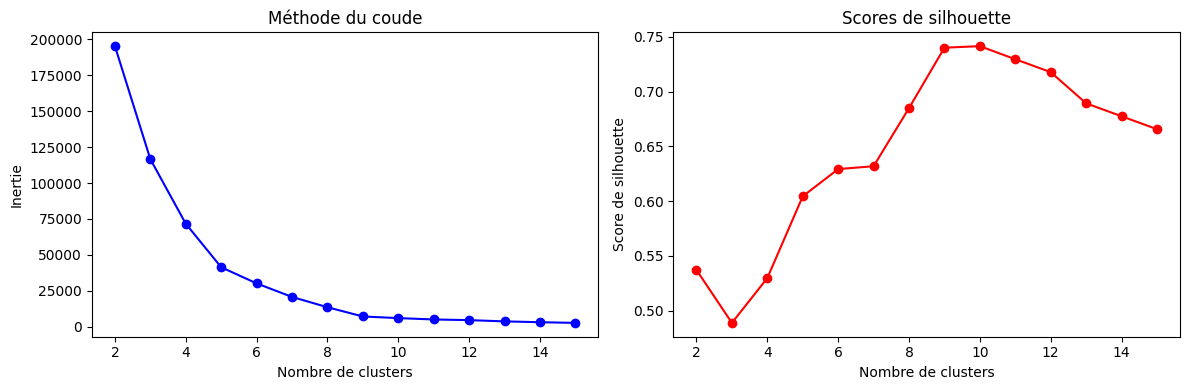

In [55]:
inertias, silhouette_scores = find_optimal_clusters(data, max_clusters=15)
plot_metrics(inertias, silhouette_scores)

In [85]:
def get_optimal_k_silhouette(silhouette_scores):
    """
    Retourne le nombre de clusters (k) qui maximise le score de silhouette.
    On suppose que silhouette_scores correspond à k allant de 2 à N.
    """
    best_index = np.argmax(silhouette_scores)
    optimal_k = best_index + 2  # car le premier score correspond à k=2
    return optimal_k

In [86]:
optimal_k = get_optimal_k_silhouette(silhouette_scores)
print("Nombre optimal de clusters (silhouette) :", optimal_k)

Nombre optimal de clusters (silhouette) : 10


In [58]:
# Fonction pour convertir un flottant en représentation IEEE 754 (32 bits)
def float_to_ieee754_bin(f):
    """Convertit un float en binaire IEEE 754 (32 bits)."""
    [binary] = struct.unpack(">I", struct.pack(">f", f))  # Conversion float → bits
    return np.array([int(bit) for bit in f"{binary:032b}"])  # Retourne une liste de 32 bits

# Initialisation des matrices
X = []
Y = []

if data.size > 0:
    for point in data:
        x_bin = float_to_ieee754_bin(point[0])
        y_bin = float_to_ieee754_bin(point[1])
        
        X.append(x_bin)  # Ajout de la représentation binaire de X
        Y.append(y_bin)  # Ajout de la représentation binaire de y
        print(point,x_bin)

# Conversion en numpy array
X = np.array(X)
Y = np.array(Y)

# Affichage des résultats
print("Matrice X (représentation IEEE 754 des flottants) :")
print(X[:5])

print("\nMatrice Y (valeurs associées en binaire IEEE 754) :")
print(Y[:5])

[18.209 18.096] [0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0]
[17.303 15.959] [0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1]
[19.783 21.903] [0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0]
[18.908 16.932] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0]
[19.894 18.854] [0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1]
[18.932 13.672] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0]
[17.573 18.753] [0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1]
[18.252 18.56 ] [0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]
[19.885 22.089] [0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1]
[18.972 19.157] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0]
[18.907 22.091] [0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1]
[19.394 21.316] [0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1]
[18.434 15.386] 

In [59]:
def generalized_deduplication_compress(X, Y, base_bits=9):
    """
    Compresses two binary matrices (X and Y) using Generalized Deduplication with base ID association.

    Args:
        X (np.ndarray): The input binary matrix for X coordinates.
        Y (np.ndarray): The input binary matrix for Y coordinates.
        base_bits (int): The number of bits to use as the base for each matrix.

    Returns:
        tuple: A tuple containing the base IDs, deviations, and the shape of the original matrices.
    """
    assert X.shape == Y.shape, "X and Y must have the same shape"
    
    original_shape = X.shape
    base_ids = []
    deviations = []
    base_dict = {}  # Dictionary to store base and their IDs
    next_base_id = 0

    for x_row, y_row in zip(X, Y):
        if len(x_row) >= base_bits and len(y_row) >= base_bits:
            # Create the base by concatenating the first `base_bits` of X and Y
            base = tuple(x_row[:base_bits]) + tuple(y_row[:base_bits])
            # Create the deviation by concatenating the remaining bits of X and Y
            deviation = np.concatenate((x_row[base_bits:], y_row[base_bits:]))

            if base in base_dict:
                base_id = base_dict[base]
            else:
                base_id = next_base_id
                base_dict[base] = base_id
                next_base_id += 1

            base_ids.append(base_id)
            deviations.append(deviation)
        else:
            # Handle cases where row length is less than base_bits
            base = tuple(x_row[:]) + tuple(y_row[:])
            deviation = np.array([])

            if base in base_dict:
                base_id = base_dict[base]
            else:
                base_id = next_base_id
                base_dict[base] = base_id
                next_base_id += 1

            base_ids.append(base_id)
            deviations.append(deviation)

    return base_ids, deviations, original_shape, base_dict

In [60]:
def generalized_deduplication_decompress(base_ids, deviations, original_shape, base_dict):
    """
    Decompresses a binary matrix compressed using Generalized Deduplication with base ID association.

    Args:
        base_ids (list): The list of base IDs.
        deviations (list): The list of deviation data.
        original_shape (tuple): The shape of the original matrix.
        base_dict (dict): The dictionary containing base and their IDs.

    Returns:
        np.ndarray: The decompressed matrix as a NumPy array.
    """
    reconstructed_matrix = []
    for base_id, deviation in zip(base_ids, deviations):
        base = None
        for b, b_id in base_dict.items():
            if b_id == base_id:
                base = np.array(b)
                break

        if base is not None:
            reconstructed_row = np.concatenate((base, deviation))
            reconstructed_matrix.append(reconstructed_row)
        else:
            print("Error: Base ID not found in base_dict")
            return None

    return np.array(reconstructed_matrix).reshape(original_shape)

In [61]:
# Compress the matrices X and Y
base_bits = 9  # Number of bits for the base
base_ids, deviations, original_shape, base_dict = generalized_deduplication_compress(X, Y, base_bits=base_bits)

print("\nBase IDs:", base_ids)
print("Deviations:", deviations)
print("Original Shape:", original_shape)
print("Base Dictionary:", base_dict)


Base IDs: [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 4, 5, 6, 2, 7, 3, 8, 2, 9, 10, 11, 9, 12, 6, 13, 10, 14, 15, 15, 16, 17, 18, 9, 17, 19, 20, 21, 22, 23, 24, 12, 20, 17, 6, 20, 15, 18, 8, 14, 24, 25, 26, 27, 26, 27, 28, 28, 26, 27, 26, 26, 27, 28, 26, 27, 29, 30, 27, 26, 28, 27, 28, 30, 26, 26, 31, 27, 27, 26, 27, 32, 33, 34, 32, 33, 35, 33, 33, 34, 32, 33, 36, 33, 33, 33, 33, 33, 32, 33, 32, 34, 32, 33, 32, 33, 33, 35, 33, 35, 32, 33, 33, 34, 32, 33, 33, 32, 33, 35, 32, 33, 32, 36, 33, 32, 34, 33, 34, 37, 38, 37, 39, 37, 37, 40, 39, 41, 39, 39, 42, 41, 41, 43, 44, 39, 45, 46, 45, 39, 37, 39, 42, 39, 47, 1, 39, 38, 39, 37, 39, 42, 44, 39, 40, 47, 37, 48, 1, 39, 39, 49, 39, 47, 41, 37, 45, 50, 39, 51, 47, 39, 37, 44, 47, 37, 41, 51, 39, 39, 42, 41, 52, 39, 47, 39, 53, 53, 53, 53, 54, 53, 54, 55, 55, 53, 53, 55, 53, 53, 55, 53, 53, 53, 53, 53, 54, 53, 53, 53, 53, 53, 55, 55, 53, 55, 

In [62]:
def compare_bitwise(a, b):
    """Compare deux tableaux de bits et retourne le plus petit et le plus grand bit à bit (poids fort à faible)."""
    for i in range(len(a)):
        if a[i] < b[i]:
            return a, b
        elif a[i] > b[i]:
            return b, a
    return a, b  # Si identiques

def compute_centroids(base_ids, deviations):
    unique_ids = np.unique(base_ids)
    centroids = {}
    weighted_centroids = {"max_deviation": {}, "mean_deviation": {}, "prod_deviation": {}}
    
    for uid in unique_ids:
        # Récupérer les indices correspondant à l'ID courant
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        # Extraire les valeurs
        selected_values = [deviations[i] for i in indices]
        # Trouver manuellement min et max en comparant bit par bit
        min_val = selected_values[0]
        max_val = selected_values[0]
        
        for val in selected_values:
            min_val, _ = compare_bitwise(min_val, val)
            _, max_val = compare_bitwise(max_val, val)
        
        print("Min:", min_val, "Max:", max_val)
        
         # Calculer la moyenne entre min et max (en entier)
        min_int = int(''.join(map(str, min_val)), 2)
        max_int = int(''.join(map(str, max_val)), 2)
        
        print("Min int:", min_int, "Max int:", max_int)
        mean_int = (min_int + max_int) // 2  # Moyenne des deux entiers
        
        # Convertir la moyenne en binaire
        mean_bin = bin(mean_int)[2:]  # On enlève le préfixe '0b'
        
        # Calculer le centroïde comme la moyenne entre min et max
        centroid = [int(bit) for bit in mean_bin.zfill(len(min_val))]  # Compléter avec des zéros si nécessaire
        
        centroids[uid] = centroid

        # Compute the maximum deviation (bitwise max - min for each dimension)
        max_deviations = []
        for i in range(len(min_val)):
            max_bit = 0
            min_bit = 1
            for val in selected_values:
                if val[i] > max_bit:
                    max_bit = val[i]
                if val[i] < min_bit:
                    min_bit = val[i]
            max_deviations.append(max_bit - min_bit)
        
        # Store the results for the maximum deviation
        print(f"Max Deviations for ID {uid}: {max_deviations}")
        
        # Calculate weighted centroids using different methods
        
        # (i) Maximum of the maximum deviations
        max_weighted_centroid = [centroid[i] * max_deviations[i] for i in range(len(centroid))]
        weighted_centroids["max_deviation"][uid] = max_weighted_centroid
        
        # (ii) Mean of the maximum deviations
        mean_deviation = np.mean(max_deviations)
        mean_weighted_centroid = [centroid[i] * mean_deviation for i in range(len(centroid))]
        weighted_centroids["mean_deviation"][uid] = mean_weighted_centroid
        
        # (iii) Product of the maximum deviations
        prod_deviation = np.prod(max_deviations)
        prod_weighted_centroid = [centroid[i] * prod_deviation for i in range(len(centroid))]
        weighted_centroids["prod_deviation"][uid] =  prod_weighted_centroid
    
    return centroids, weighted_centroids
    
centroids, weighted_centroids = compute_centroids(base_ids, deviations)
print("Centroids:", centroids)
print("Weighted Centroids:", weighted_centroids)

Min: [0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 1 1] Max: [0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 0 1 0 0]
Min int: 3980235257151 Max int: 22460825592660
Max Deviations for ID 0: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Min: [0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1] Max: [0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Min int: 3549225155559 Max int: 30553231392768
Max Deviations for ID 1: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Min: [0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 0 0] Max: [1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 

In [63]:
def reconstruct_points(base_dict, centroids, base_bits=9, centroid_bits=23):
    """
    Reconstructs the original points (X, Y) from the centroids and base dictionary.

    Args:
        base_dict (dict): Dictionary mapping bases to their IDs.
        centroids (dict): Dictionary mapping base IDs to their centroids.
        base_bits (int): Number of bits used for the base.
        centroid_bits (int): Number of bits in the centroid.

    Returns:
        list: A list of reconstructed points [(X1, Y1), (X2, Y2), ...].
    """
    reconstructed_points = []

    # Inverse the base_dict to map IDs back to bases
    id_to_base = {v: k for k, v in base_dict.items()}

    for base_id, centroid in centroids.items():
        # Retrieve the base corresponding to the base_id
        base = id_to_base[base_id]

        # Split the base into its X and Y components
        base_x = list(base[:base_bits])  # Convert tuple slice to list (X part of the base)
        base_y = list(base[base_bits:])  # Convert tuple slice to list (Y part of the base)

        # Split the centroid into its X and Y components
        centroid_x = centroid[:centroid_bits]  # First `centroid_bits` bits (X part of the centroid)
        centroid_y = centroid[centroid_bits:]  # Last `centroid_bits` bits (Y part of the centroid)

        # Reconstruct X coordinate
        x_bits = base_x + centroid_x  # Concatenate base X and centroid X

        # Reconstruct Y coordinate
        y_bits = base_y + centroid_y  # Concatenate base Y and centroid Y

        # Append the reconstructed point (X, Y)
        reconstructed_points.append((x_bits, y_bits))

    return reconstructed_points

In [64]:
# Reconstruction des points
reconstructed_points = reconstruct_points(base_dict, centroids)
print("Reconstructed Points:", reconstructed_points[0])
print("Taille", len(reconstructed_points))

Reconstructed Points: ([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])
Taille 74


In [65]:
def ieee754_bin_to_float(bits):
    """
    Convertit une représentation binaire IEEE 754 (32 bits) en flottant.

    Args:
        bits (list): Une liste de 32 bits (0 ou 1).

    Returns:
        float: La valeur flottante correspondante.
    """
    # Convertir les bits en une chaîne binaire
    binary_str = ''.join(map(str, bits))
    
    # Convertir la chaîne binaire en un entier non signé
    integer_value = int(binary_str, 2)
    
    # Interpréter l'entier comme un flottant IEEE 754 (32 bits)
    [float_value] = struct.unpack(">f", struct.pack(">I", integer_value))
    
    return float_value

In [66]:
# Conversion des points reconstruits en flottants
def convert_reconstructed_points_to_float(reconstructed_points):
    """
    Convertit les points reconstruits (en bits IEEE 754) en coordonnées flottantes.

    Args:
        reconstructed_points (list): Liste des points sous forme de tuples de listes de bits [(X_bits, Y_bits), ...].

    Returns:
        list: Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
    """
    float_points = []
    for x_bits, y_bits in reconstructed_points:
        # Convertir les bits en flottants
        x_float = ieee754_bin_to_float(x_bits)
        y_float = ieee754_bin_to_float(y_bits)
        float_points.append((x_float, y_float))
    return float_points

In [67]:
# Conversion des points reconstruits en flottants
float_points = convert_reconstructed_points_to_float(reconstructed_points)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

Points reconstruits en flottants :
(19.006000518798828, 16.630998611450195)
(19.876998901367188, 14.468249320983887)
(-2.6857998371124268, 7.167600154876709)
(-0.3894450068473816, 4.170050144195557)
(0.24063999950885773, 8.882499694824219)
(0.6174899935722351, 6.320199966430664)
(-1.4048999547958374, 14.011149406433105)
(0.30390000343322754, 6.039299964904785)
(-2.8434500694274902, 2.9273998737335205)
(-0.16630500555038452, 11.859000205993652)
(-0.34399500489234924, 12.259499549865723)
(-2.0659000873565674, 11.345000267028809)
(0.8899499773979187, 15.269499778747559)
(-0.09582799673080444, 11.734000205993652)
(-4.015500068664551, 1.0139000415802002)
(-1.2510000467300415, 5.438449859619141)
(0.152319997549057, 5.21750020980835)
(-3.2402000427246094, 0.6615899801254272)
(0.0917925015091896, 8.754500389099121)
(-1.9883999824523926, 2.434000015258789)
(-0.7269749641418457, 15.544499397277832)
(-0.9041100144386292, 4.057499885559082)
(-1.5533000230789185, 1.957200050354004)
(-0.044877998530

In [68]:
# Affichage des points reconstruits
def plot_reconstructed_points(float_points):
    """
    Affiche les points reconstruits dans un graphique 2D.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
    """
    # Extraire les coordonnées X et Y
    x_coords, y_coords = zip(*float_points)

    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', s=50, alpha=0.7, edgecolor='k')
    plt.title("Points Reconstruits", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)

    # Afficher le graphique
    plt.show()

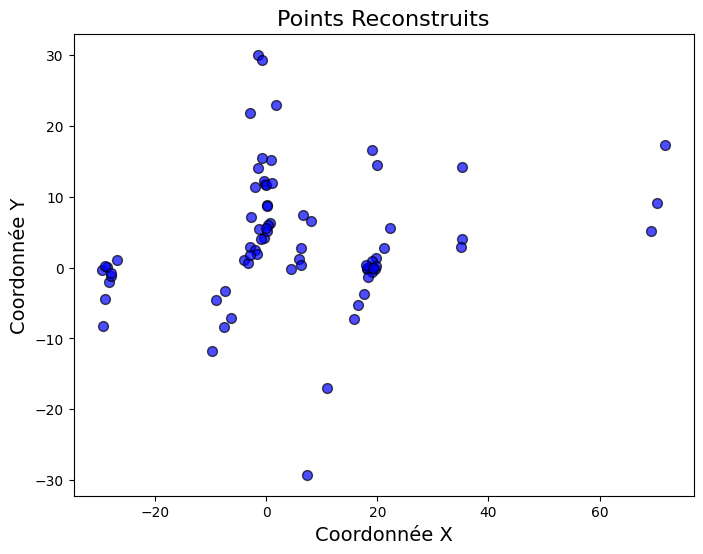

In [69]:
plot_reconstructed_points(float_points)

In [70]:
# Application de K-Means et visualisation
def apply_kmeans_and_plot(float_points, n_clusters):
    """
    Applique K-Means sur les points reconstruits et affiche les clusters ainsi que les métriques.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
        n_clusters (int): Nombre de clusters pour K-Means.
    """
    # Conversion en tableau NumPy
    points_array = np.array(float_points)

    # Mesurer le temps d'exécution
    start_time = time.time()

    # Initialisation et application de K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(points_array)

    # Mesurer le temps d'exécution
    end_time = time.time()
    execution_time = end_time - start_time

    # Centres des clusters
    cluster_centers = kmeans.cluster_centers_

    # Inertie (somme des distances intra-cluster)
    inertia = kmeans.inertia_

    # Score de silhouette (si plus de 1 cluster)
    if n_clusters > 1:
        silhouette = silhouette_score(points_array, labels)
    else:
        silhouette = None  # Le score de silhouette n'est pas défini pour un seul cluster

    # Afficher les résultats
    print("Centres trouvés par K-Means :")
    print(cluster_centers)
    print("\nInertie (somme des distances intra-cluster) :", inertia)
    if silhouette is not None:
        print("Score de silhouette :", silhouette)
    print(f"\nTemps d'exécution de K-Means : {execution_time:.4f} secondes")

    # Visualisation des clusters
    plt.figure(figsize=(8, 6))
    for cluster_id in range(n_clusters):
        # Sélectionner les points appartenant au cluster actuel
        cluster_points = points_array[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)

    # Afficher les centres des clusters
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label="Centres des Clusters")

    # Ajouter des détails au graphique
    plt.title("Clustering avec K-Means", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

Centres trouvés par K-Means :
[[  6.27180847   3.03537161]
 [-28.49144448  -1.73138883]
 [ 70.47633616  10.53828303]
 [ 35.20299911   7.04908315]
 [ -5.12564095  -2.22138274]
 [ 16.68166637  -5.38744998]
 [ -0.37111908   9.19788051]
 [ -0.83033246  26.05287457]
 [ 19.31623332   2.66143685]
 [  9.19952512 -23.12650013]]

Inertie (somme des distances intra-cluster) : 1505.0934741895364
Score de silhouette : 0.5097279648444948

Temps d'exécution de K-Means : 0.0039 secondes


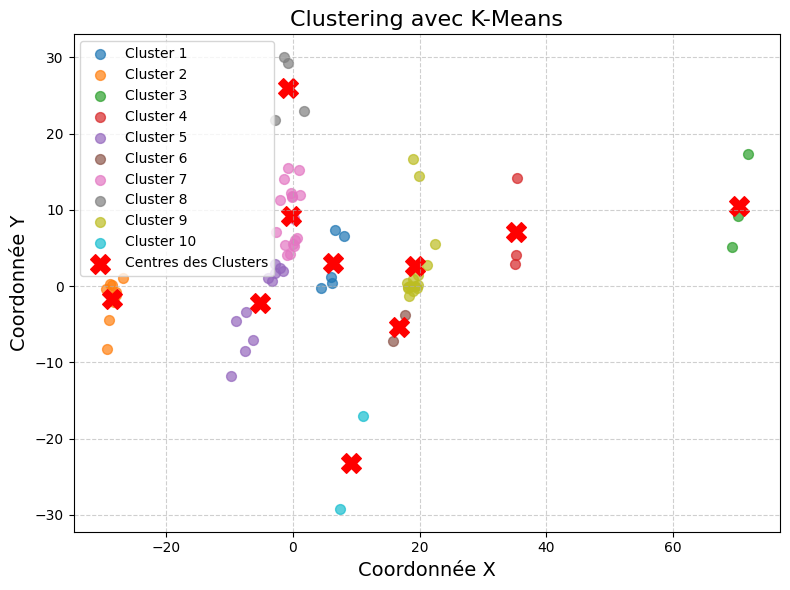

In [71]:
apply_kmeans_and_plot(float_points, n_clusters = n_clusters)

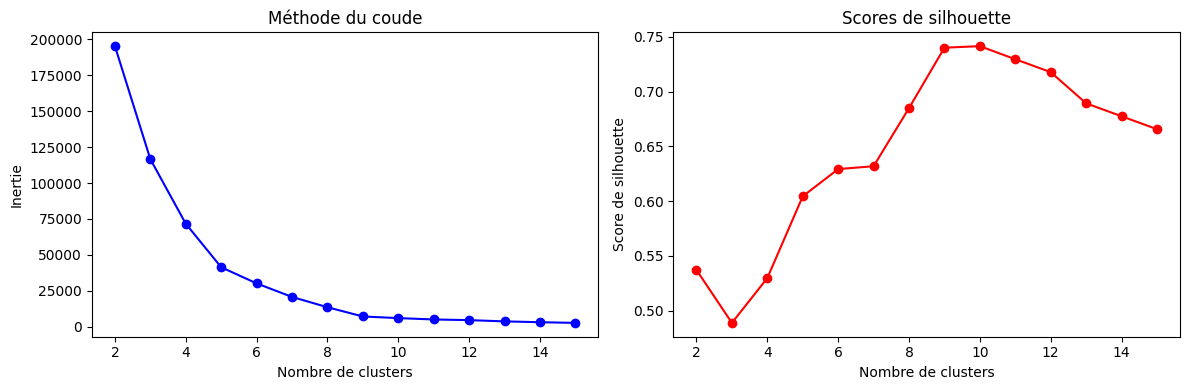

In [72]:
inertias_bis, silhouette_scores_bis = find_optimal_clusters(float_points, max_clusters=15)
plot_metrics(inertias, silhouette_scores)

In [73]:
optimal_k_bis = get_optimal_k_silhouette(silhouette_scores_bis)
print("Nombre optimal de clusters (silhouette) :", optimal_k_bis)

Nombre optimal de clusters (silhouette) : 11


In [74]:
def compute_centroids_with_weights(base_ids, deviations):
    """
    Calcule les centroïdes pour chaque base ID et associe un poids à chaque base.
    Le poids est défini comme le nombre de déviations associées à la base.

    Args:
        base_ids (list): Liste des IDs des bases.
        deviations (list): Liste des déviations associées.

    Returns:
        dict: Dictionnaire contenant les centroïdes pour chaque base ID.
        dict: Dictionnaire contenant les poids pour chaque base ID.
    """
    unique_ids = np.unique(base_ids)
    centroids = {}
    weights = {}

    for uid in unique_ids:
        # Récupérer les indices correspondant à l'ID courant
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        # Extraire les déviations associées
        selected_values = [deviations[i] for i in indices]

        # Convertir en entier, puis calculer la moyenne
        ints = [int(''.join(map(str, val)), 2) for val in selected_values]
        mean_int = round(np.mean(ints))

        # Reconvertir la moyenne en binaire
        mean_bits = [int(x) for x in bin(mean_int)[2:].zfill(len(selected_values[0]))]

        centroids[uid] = mean_bits
        weights[uid] = len(selected_values)

        """
        # Trouver manuellement min et max en comparant bit par bit
        min_val = selected_values[0]
        max_val = selected_values[0]

        for val in selected_values:
            min_val, _ = compare_bitwise(min_val, val)
            _, max_val = compare_bitwise(max_val, val)

        # Calculer la moyenne entre min et max (en entier)
        min_int = int(''.join(map(str, min_val)), 2)
        max_int = int(''.join(map(str, max_val)), 2)
        mean_int = (min_int + max_int) // 2  # Moyenne des deux entiers

        # Convertir la moyenne en binaire
        mean_bin = bin(mean_int)[2:]  # On enlève le préfixe '0b'
        
        # Calculer le centroïde comme la moyenne entre min et max
        centroid = [int(bit) for bit in mean_bin.zfill(len(min_val))]  # Compléter avec des zéros si nécessaire
        centroids[uid] = centroid

        # Associer un poids à la base (nombre de déviations associées)
        weights[uid] = len(selected_values)
        """
    return centroids, weights

# Exemple d'utilisation
centroids_with_weights, weights = compute_centroids_with_weights(base_ids, deviations)
print("Centroids with Weights:", centroids_with_weights)
print("Weights:", weights)

Centroids with Weights: {0: [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], 1: [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], 2: [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], 3: [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], 4: [1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], 5: [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], 6: [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [75]:
# Reconstruction des points
reconstructed_points_bis = reconstruct_points(base_dict, centroids_with_weights)
print("Reconstructed Points:", reconstructed_points_bis[0])
print("Taille", len(reconstructed_points_bis))

Reconstructed Points: ([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])
Taille 74


In [76]:
# Conversion des points reconstruits en flottants
float_points_bis = convert_reconstructed_points_to_float(reconstructed_points)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

Points reconstruits en flottants :
(19.006000518798828, 16.630998611450195)
(19.876998901367188, 14.468249320983887)
(-2.6857998371124268, 7.167600154876709)
(-0.3894450068473816, 4.170050144195557)
(0.24063999950885773, 8.882499694824219)
(0.6174899935722351, 6.320199966430664)
(-1.4048999547958374, 14.011149406433105)
(0.30390000343322754, 6.039299964904785)
(-2.8434500694274902, 2.9273998737335205)
(-0.16630500555038452, 11.859000205993652)
(-0.34399500489234924, 12.259499549865723)
(-2.0659000873565674, 11.345000267028809)
(0.8899499773979187, 15.269499778747559)
(-0.09582799673080444, 11.734000205993652)
(-4.015500068664551, 1.0139000415802002)
(-1.2510000467300415, 5.438449859619141)
(0.152319997549057, 5.21750020980835)
(-3.2402000427246094, 0.6615899801254272)
(0.0917925015091896, 8.754500389099121)
(-1.9883999824523926, 2.434000015258789)
(-0.7269749641418457, 15.544499397277832)
(-0.9041100144386292, 4.057499885559082)
(-1.5533000230789185, 1.957200050354004)
(-0.044877998530

In [77]:
# Conversion des points reconstruits en flottants
float_points = convert_reconstructed_points_to_float(reconstructed_points_bis)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

Points reconstruits en flottants :
(19.035999298095703, 25.756465911865234)
(18.53411865234375, 8.3390531539917)
(-2.3924999237060547, 6.483175277709961)
(-0.3894450068473816, 4.170050144195557)
(0.24063999950885773, 8.882499694824219)
(0.6174899935722351, 6.320199966430664)
(-1.3796666860580444, 9.884699821472168)
(0.30390000343322754, 6.039299964904785)
(-2.8434500694274902, 2.9274001121520996)
(-0.1619766652584076, 13.896599769592285)
(-0.34399500489234924, 12.259500503540039)
(-2.0659000873565674, 11.345000267028809)
(0.8899499773979187, 15.269499778747559)
(-0.09582799673080444, 11.734000205993652)
(-4.015500068664551, 1.0139000415802002)
(-1.2713667154312134, 5.031866550445557)
(0.152319997549057, 5.21750020980835)
(-3.223766565322876, 0.9936500191688538)
(0.0917925015091896, 8.754500389099121)
(-1.9883999824523926, 2.434000015258789)
(-0.7060700058937073, 11.503000259399414)
(-0.9041100144386292, 4.057499885559082)
(-1.5533000230789185, 1.957200050354004)
(-0.044877998530864716,

In [78]:
def apply_kmeans_with_weights_and_plot(float_points, weights, n_clusters):
    """
    Applique K-Means sur les points reconstruits en tenant compte des poids et affiche les clusters ainsi que les métriques.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
        weights (dict): Dictionnaire contenant les poids associés à chaque base ID.
        n_clusters (int): Nombre de clusters pour K-Means.
    """
    # Conversion en tableau NumPy
    points_array = np.array(float_points)

    # Création d'un tableau de poids aligné avec les points
    weight_array = np.array([weights[base_id] for base_id in range(len(float_points))])

    # Mesurer le temps d'exécution
    start_time = time.time()

    # Initialisation et application de K-Means avec les poids
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(points_array, sample_weight=weight_array)

    # Mesurer le temps d'exécution
    end_time = time.time()
    execution_time = end_time - start_time

    # Centres des clusters
    cluster_centers = kmeans.cluster_centers_

    # Inertie (somme des distances intra-cluster)
    inertia = kmeans.inertia_

    # Score de silhouette (sans poids, car non supporté)
    if n_clusters > 1:
        silhouette = silhouette_score(points_array, labels)
    else:
        silhouette = None  # Le score de silhouette n'est pas défini pour un seul cluster

    # Afficher les résultats
    print("Centres trouvés par K-Means :")
    print(cluster_centers)
    print("\nInertie (somme des distances intra-cluster) :", inertia)
    if silhouette is not None:
        print("Score de silhouette :", silhouette)
    print(f"\nTemps d'exécution de K-Means : {execution_time:.4f} secondes")

    # Visualisation des clusters
    plt.figure(figsize=(8, 6))
    for cluster_id in range(n_clusters):
        # Sélectionner les points appartenant au cluster actuel
        cluster_points = points_array[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)

    # Afficher les centres des clusters
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label="Centres des Clusters")

    # Ajouter des détails au graphique
    plt.title("Clustering avec K-Means (avec poids)", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

Centres trouvés par K-Means :
[[ 19.67018296   3.40134825]
 [ -8.38403524 -10.06752518]
 [ 70.62982     16.60212749]
 [ -1.9407111   24.34876242]
 [ -1.20159774   7.22079892]
 [-29.02433273  -5.21776653]
 [ 19.0359993   25.75646591]
 [ 10.4007319  -19.04824322]
 [  6.33213454   4.25846485]
 [ 35.54890427   7.04838269]]

Inertie (somme des distances intra-cluster) : 12333.873098116032
Score de silhouette : 0.569338264729247

Temps d'exécution de K-Means : 0.0022 secondes


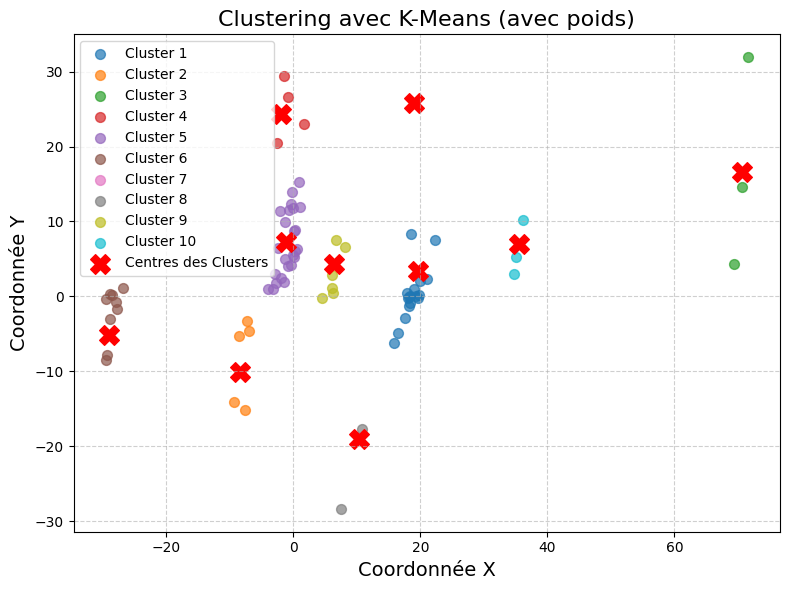

In [79]:
apply_kmeans_with_weights_and_plot(float_points, weights, n_clusters=n_clusters)

In [80]:
def compute_weighted_centroids(base_dict, base_ids, deviations, base_bits=9):
    unique_ids = np.unique(base_ids)
    centroids = {}
    max_of_max_deviations = {}
    mean_of_max_deviations = {}
    prod_of_max_deviations = {}

    id_to_bases = {uid: [] for uid in unique_ids}
    for base, bid in base_dict.items():
        if bid in id_to_bases:
            id_to_bases[bid].append(base)

    for uid in unique_ids:
        base_tuple = id_to_bases[uid][0]  # base = 18 bits (9 + 9)
        base_x = list(base_tuple[:base_bits])
        base_y = list(base_tuple[base_bits:2 * base_bits])
        base_bits_full = base_x + base_y  # 18 bits

        # Récupérer les déviations (46 bits) associées à l'uid
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        selected_deviations = [deviations[i] for i in indices]

        # Initialisation
        min_dev = selected_deviations[0]
        max_dev = selected_deviations[0]

        for dev in selected_deviations:
            min_dev, _ = compare_bitwise(min_dev, dev)
            _, max_dev = compare_bitwise(max_dev, dev)

        # Moyenne bitwise sur l'ensemble des 46 bits
        min_int = int(''.join(map(str, min_dev)), 2)
        max_int = int(''.join(map(str, max_dev)), 2)
        mean_int = (min_int + max_int) // 2
        mean_dev_bin = bin(mean_int)[2:].zfill(46)
        mean_dev = [int(b) for b in mean_dev_bin]

        # Centroïde complet = base_x + base_y + moyenne des déviations
        centroid = mean_dev
        centroids[uid] = centroid

        # Pour le poids "max of max" : concat base_x + max_dev_x, base_y + max_dev_y
        max_dev_x = [val[:23] for val in selected_deviations]
        max_dev_y = [val[23:] for val in selected_deviations]

        # Trouver les plus grandes déviations X et Y
        max_dx = max_dev_x[0]
        max_dy = max_dev_y[0]
        for dx, dy in zip(max_dev_x, max_dev_y):
            _, max_dx = compare_bitwise(max_dx, dx)
            _, max_dy = compare_bitwise(max_dy, dy)

        # Concat binaire
        base_x_str = ''.join(map(str, base_x))
        base_y_str = ''.join(map(str, base_y))
        max_dx_str = ''.join(map(str, max_dx))
        max_dy_str = ''.join(map(str, max_dy))

        concat_x = int(base_x_str + max_dx_str, 2)
        concat_y = int(base_y_str + max_dy_str, 2)
        
        maximum_weight = concat_x if concat_x > concat_y else concat_y
        mean_weight = (concat_x + concat_y)//2
        prod_weight = (concat_x * concat_y)//1000000

        max_of_max_deviations[uid] = maximum_weight
        mean_of_max_deviations[uid] = mean_weight
        prod_of_max_deviations[uid] = prod_weight//10000

        #print(f"UID: {uid}, Centroid: {centroid}, MaxWeight: , MeanWeight: {mean_weight:.4f}, ProdWeight: {prod_weight:.4f}")

    return centroids, max_of_max_deviations, mean_of_max_deviations, prod_of_max_deviations


In [81]:
print("Calcul des centroids et de leur poids ")
centroids2, max_of_max, mean_of_max, prod_of_max= compute_weighted_centroids(base_dict, base_ids, deviations)
reconstructed_points_2 = reconstruct_points(base_dict, centroids2)
float_points = convert_reconstructed_points_to_float(reconstructed_points_2)

print("Centroids: ", float_points)
print("Weigths max of max: ", max_of_max)
print("Weigths mean of max: ", mean_of_max)
print("Weigths product of max: ",prod_of_max)

Calcul des centroids et de leur poids 
Centroids:  [(19.006000518798828, 16.630998611450195), (19.876998901367188, 14.468249320983887), (-2.6857998371124268, 7.167600154876709), (-0.3894450068473816, 4.170050144195557), (0.24063999950885773, 8.882499694824219), (0.6174899935722351, 6.320199966430664), (-1.4048999547958374, 14.011149406433105), (0.30390000343322754, 6.039299964904785), (-2.8434500694274902, 2.9273998737335205), (-0.16630500555038452, 11.859000205993652), (-0.34399500489234924, 12.259499549865723), (-2.0659000873565674, 11.345000267028809), (0.8899499773979187, 15.269499778747559), (-0.09582799673080444, 11.734000205993652), (-4.015500068664551, 1.0139000415802002), (-1.2510000467300415, 5.438449859619141), (0.152319997549057, 5.21750020980835), (-3.2402000427246094, 0.6615899801254272), (0.0917925015091896, 8.754500389099121), (-1.9883999824523926, 2.434000015258789), (-0.7269749641418457, 15.544499397277832), (-0.9041100144386292, 4.057499885559082), (-1.55330002307891

K-means sur les maximum de déviation
Méthode 1: Moyennne des Maximums de déviations
Centres trouvés par K-Means :
[[  6.01778765   2.58648208]
 [-28.53501541  -2.0141919 ]
 [ 70.47825183  10.54713461]
 [ -1.19540437  26.48700609]
 [ -1.69799284   3.67763157]
 [ 18.5323234   -1.0420854 ]
 [ -0.45626915  12.40008513]
 [  9.20075915 -23.12237676]
 [ 28.89192666  10.46193006]
 [ -7.98741564  -7.04669693]]

Inertie (somme des distances intra-cluster) : 1882172853004.282
Score de silhouette : 0.616103549639723

Temps d'exécution de K-Means : 0.0443 secondes


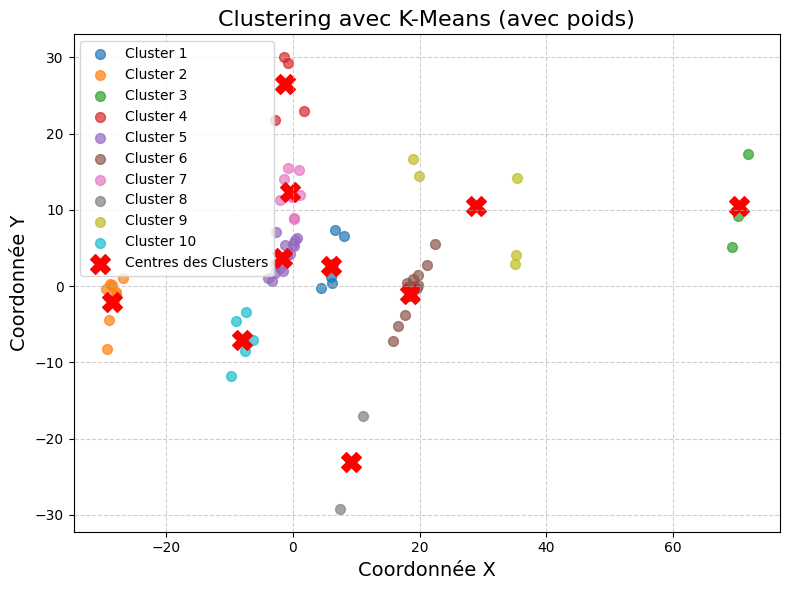

In [82]:
print("K-means sur les maximum de déviation")
print("Méthode 1: Moyennne des Maximums de déviations")
apply_kmeans_with_weights_and_plot(float_points, mean_of_max, n_clusters=n_clusters)

Méthode 2: produit des des de déviations
Centres trouvés par K-Means :
[[ -7.98812167  -7.04908501]
 [ 35.20376615   7.07881257]
 [-28.59168928  -2.38228003]
 [ -1.78150019   3.59388694]
 [ 18.45931167  -0.35803518]
 [ 70.48019923  10.55613275]
 [ -1.34559937  26.6648423 ]
 [  9.20478332 -23.10893041]
 [ -0.55340685  12.51346947]
 [  5.82607387   2.24774804]]

Inertie (somme des distances intra-cluster) : 332522980220.4341
Score de silhouette : 0.6075998701459948

Temps d'exécution de K-Means : 0.0040 secondes


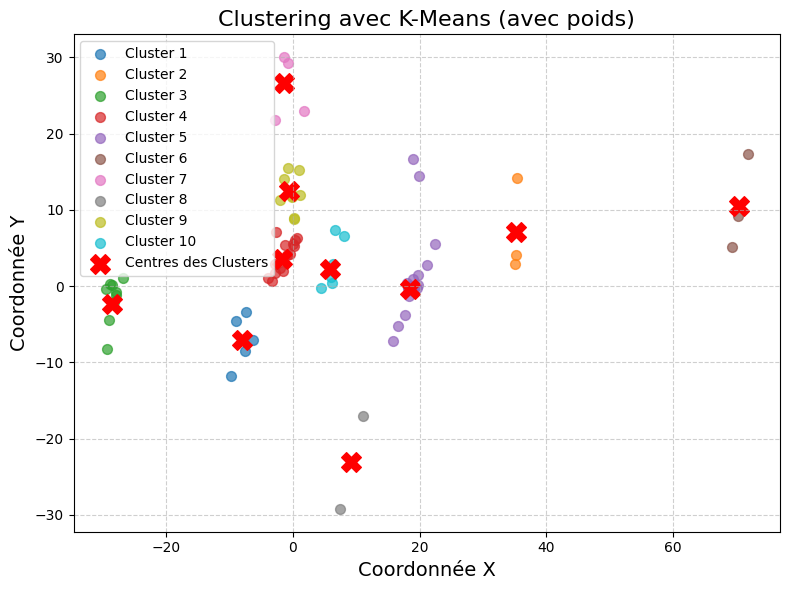

In [83]:
print("Méthode 2: produit des des de déviations")
apply_kmeans_with_weights_and_plot(float_points, prod_of_max, n_clusters=n_clusters)

Méthode 3: Maximum des maximums de deviations
Centres trouvés par K-Means :
[[  5.82579221   2.23502575]
 [-28.49156723  -1.73179609]
 [ 70.47653392  10.53920925]
 [ -1.33643261  26.65500474]
 [ -1.7827137    3.58625297]
 [ 18.40485904  -1.30996791]
 [ -0.54662354  12.49976855]
 [  9.19934692 -23.12709555]
 [ 28.9202562   10.43810282]
 [ -7.98740933  -7.04593109]]

Inertie (somme des distances intra-cluster) : 2222002918837.5
Score de silhouette : 0.616103549639723

Temps d'exécution de K-Means : 0.0041 secondes


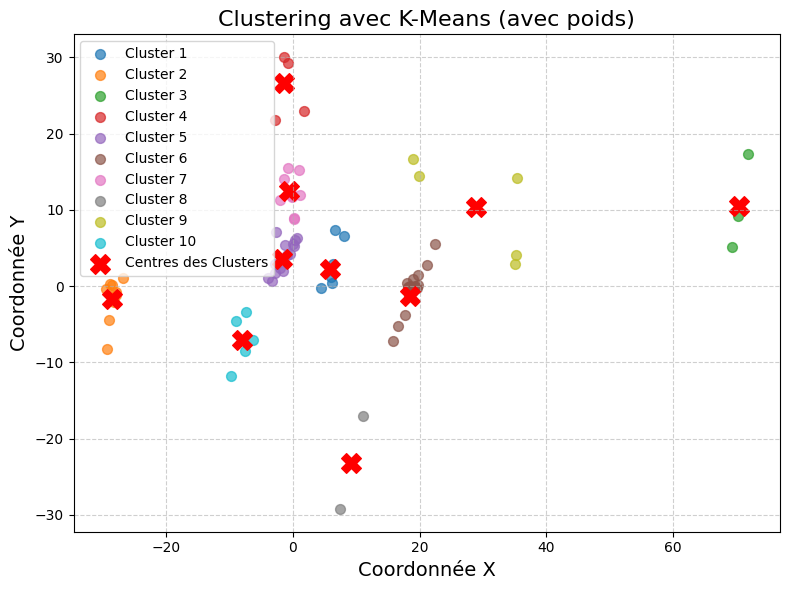

In [84]:
print("Méthode 3: Maximum des maximums de deviations")
apply_kmeans_with_weights_and_plot(float_points, max_of_max, n_clusters=n_clusters)